In [7]:
library(readr)
library(dplyr)
library(tidyr)
library(ggplot2)
library(gbm)
library(randomForest)

ERROR: Error in library(readr): there is no package called ‘readr’


In [4]:
install.packages("readr")
install.packages("tidyr")
install.packages("gbm")
install.packages("ggplot2")
install.packages("randomForest")

also installing the dependencies ‘fansi’, ‘utf8’, ‘pillar’, ‘rlang’, ‘Rcpp’, ‘tibble’, ‘hms’

Warning message in install.packages("readr"):
“installation of package ‘fansi’ had non-zero exit status”Warning message in install.packages("readr"):
“installation of package ‘utf8’ had non-zero exit status”Warning message in install.packages("readr"):
“installation of package ‘rlang’ had non-zero exit status”Warning message in install.packages("readr"):
“installation of package ‘Rcpp’ had non-zero exit status”Warning message in install.packages("readr"):
“installation of package ‘pillar’ had non-zero exit status”Warning message in install.packages("readr"):
“installation of package ‘hms’ had non-zero exit status”Warning message in install.packages("readr"):
“installation of package ‘tibble’ had non-zero exit status”Warning message in install.packages("readr"):
“installation of package ‘readr’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... don

In [8]:
sample <- read_csv("Data/wine-reviews/cleanwine.csv")

ERROR: Error in read_csv("Data/wine-reviews/cleanwine.csv"): could not find function "read_csv"


In [2]:
sample %>% head

ERROR: Error in sample %>% head: could not find function "%>%"


In [4]:
sample %>% group_by(country, taster_name) %>% summarize("Average_Price" = mean(price, na.rm = T), 
                                                                                 "Count" = n()) %>% 
filter(is.na(Average_Price))

,country,taster_name,Average_Price,Count
1,Egypt,Susan Kostrzewa,NaN,1
2,Greece,Roger Voss,NaN,1
3,Israel,Susan Kostrzewa,NaN,1


In [5]:
sample %>% filter(is.na(price)) %>% group_by(country, taster_name) %>% summarize("Count" = n()) 

,country,taster_name,Count
1,Argentina,Michael Schachner,43
2,Australia,Joe Czerwinski,23
3,Australia,NA,5
4,Austria,Anne Krebiehl MW,219
5,Austria,Roger Voss,279
6,Brazil,Michael Schachner,5
7,Canada,Joe Czerwinski,1
8,Canada,Paul Gregutt,1
9,Chile,Michael Schachner,54
10,Croatia,Susan Kostrzewa,2


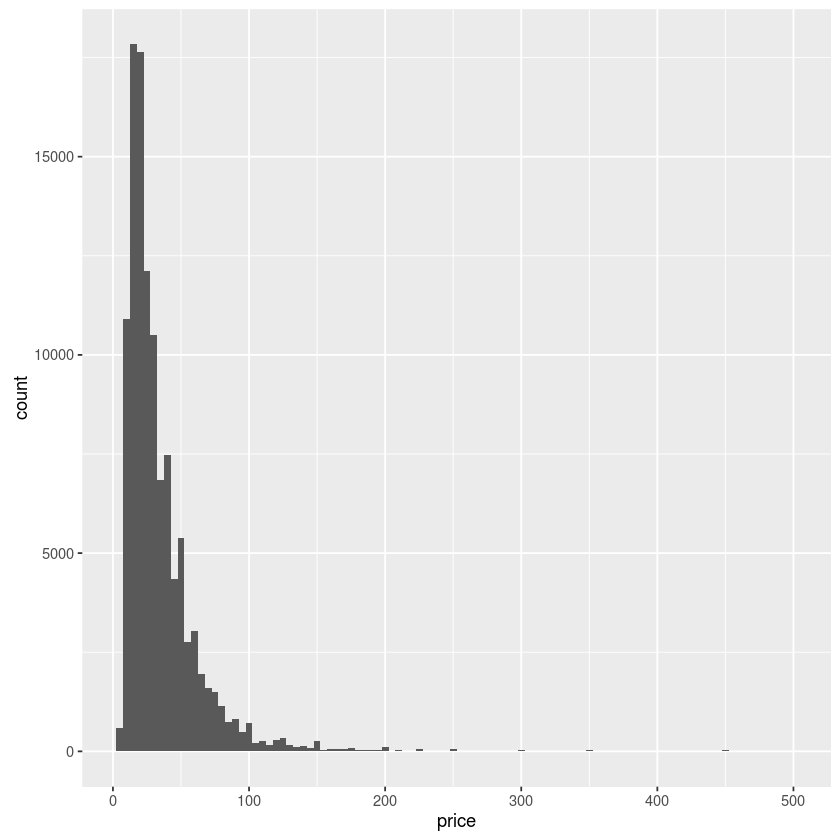

In [6]:
sample %>% filter(price < 500) %>% ggplot(aes(x = price)) + geom_histogram(bins = 100)

In [8]:
sample %>% group_by(variety) %>% summarize("Average_Price" = mean(price, na.rm = T), 
                                                                                 "Count" = n()) %>% 
filter(is.na(Average_Price)) %>% select(variety) %>% unlist() -> drop_variety

In [9]:
sample %>% filter(!(variety %in% drop_variety)) -> sample2

In [16]:
impute_mean <- function(x) replace(x, is.na(x), mean(x, na.rm = TRUE))

In [29]:
sample2 %>% group_by(variety) %>% mutate(price = impute_mean(price)) %>% select(-description) -> cleanwine_price

In [30]:
cleanwine_price %>% head

,country,points,price,province,taster_name,title,variety,winery
1,Italy,87,23.1665,Sicily & Sardinia,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
2,Portugal,87,15,Douro,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
3,US,87,14,Oregon,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
4,US,87,13,Michigan,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
5,US,87,65,Oregon,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks
6,Spain,87,15,Northern Spain,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra),Tempranillo-Merlot,Tandem


In [38]:
cleanwine_price$country <- factor(cleanwine_price$country)
cleanwine_price$province <- factor(cleanwine_price$province)
cleanwine_price$taster_name <- factor(cleanwine_price$taster_name)
cleanwine_price$title <- factor(cleanwine_price$title)
cleanwine_price$variety <- factor(cleanwine_price$variety)
cleanwine_price$winery <- factor(cleanwine_price$winery)

In [ ]:
gbmFit <- gbm(formula = price ~ ., data = cleanwine_price %>% select(-title, -winery), 
              n.trees = 1000, shrinkage = 0.01, interaction.depth = 2, cv.folds = 10, 
              distribution = "gaussian")

best_iter <- gbm.perf(gbmFit, method = "cv")

# Performance on whole dataset

diff_squared <- (data$price - 
    predict(gbmFit, newdata = cleanwine_price$price, n.trees = best_iter))^2

mean(diff_squared, na.rm = TRUE)